<a href="https://colab.research.google.com/github/Rupal-D/LGMVIP-DataScience/blob/main/IrisFlowersClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# **LETSGROWMORE VIRTUAL INTERNSHIP**

## **Title:** Iris Flowers Classification using Machine Learning

## **Created By:** Rupal D'Souza

## **Level:** Beginner 



---



---




![](https://drive.google.com/uc?export=view&id=1YaNM0Y8vCddb7IZjYiNWZSCgKk9yyh4i)

*Importing required libraries* 

In [ ]:
# for data analysis
import pandas as pd

# for data visualization
import seaborn as sns

# plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt

# for Creating a Line2D instance
from matplotlib.lines import Line2D

# for plotting normal continuous random variable
from scipy.stats import norm

# warnings
import warnings
warnings.filterwarnings('ignore')    

In [ ]:
# Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


*Loading the data into the dataframe* 

In [ ]:
# loading the data into the dataframe

df = pd.read_csv('/content/gdrive/My Drive/iris_data.data',header=None )

**EXPLORATORY DATA ANALYSIS**  

In [ ]:
# display the imported data

df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# adding column name to the respective columns

df.columns =['sepal length', 'sepal width', 'petal length', 'petal width','class']

In [ ]:
# display the imported data

df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# number of rows and columns

df.shape

(150, 5)

- There are 150 rows and 5 columns in this dataset.

In [ ]:
# names of the columns

print("The column names are :", df.columns)

The column names are : Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')


In [ ]:
# finding the info of the data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- All the columns are of float datatype.
- The class variable is of object datatype

In [ ]:
#Total number of null values

df.isnull().sum().to_frame(name = 'Total_null' )

,Total_null
sepal length,0
sepal width,0
petal length,0
petal width,0
class,0


- There are no null values in the dataset.

In [ ]:
#checking for number of duplicate rows

df.duplicated().sum()

3

- There are 3 values that are duplicates

In [ ]:
df[df.duplicated()]

,sepal length,sepal width,petal length,petal width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


- We won't dropping the rows as the data is based on the iris flower and we know that this is prevelant in nature wherein the observations considered have same values.

In [ ]:
#Summary Statistics

df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- We can observe that the mean values are almost equal to the  median values for sepal length and sepal width columns and hence they are normal.
- Usually the distribution is skewed in the direction of the outlier.
- There is a large difference between the maximum value and the 75 percentile for sepal width columns, hence it contains outliers.


In [ ]:
# understanding the target variable

df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# finding the count

df['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [ ]:
# mapping categorical variables of target variable to numeric variables

df['class']=df['class'].map({'Iris-setosa':1, 'Iris-versicolor':2,'Iris-virginica':3})

In [ ]:
# display the data

df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


**DATA VISUALIZATIONS:** 

*a) Outliers* 

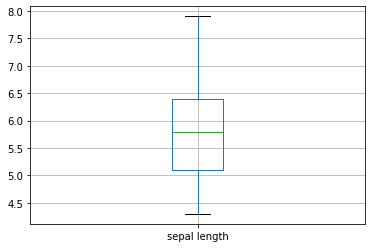

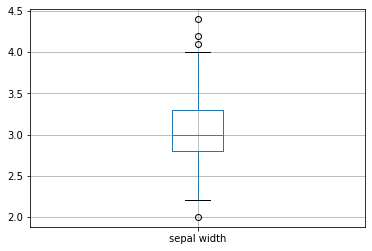

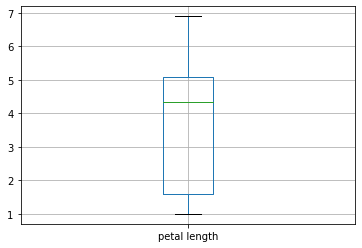

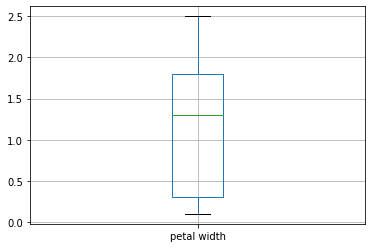

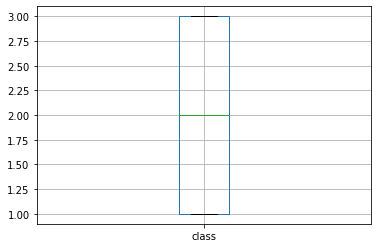

In [ ]:
# box plot to check outliers

for i in df.columns:
  df[i].plot.box(grid=True)
  plt.show()

*b) Histograms* 

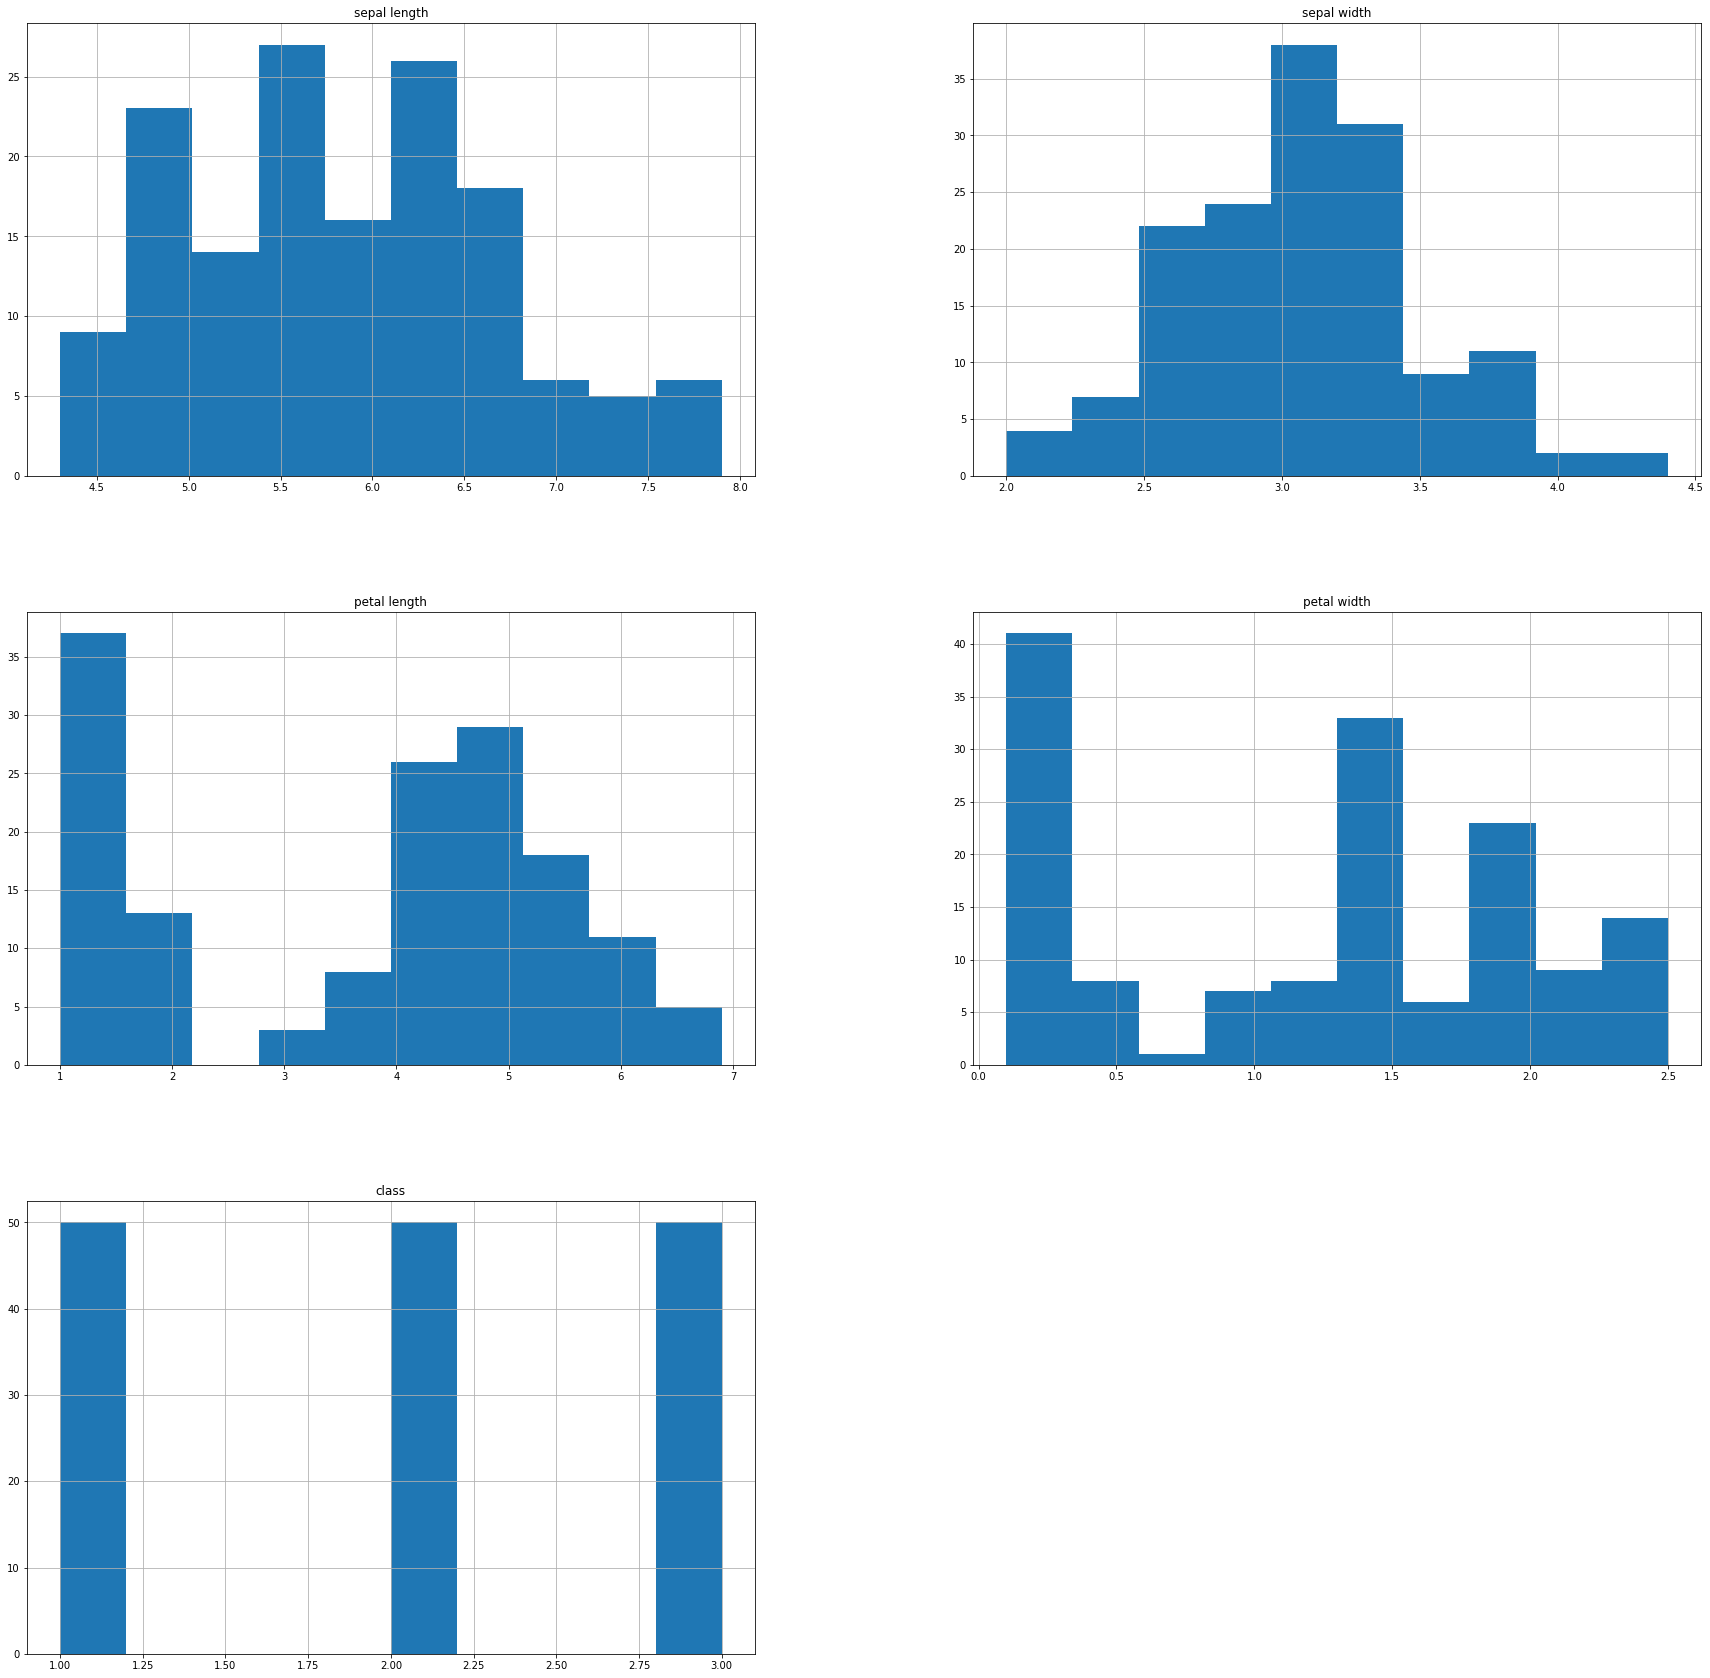

In [ ]:
# histograms

df.hist(figsize=(30,30))
plt.show()

*c) Normal distribution* 

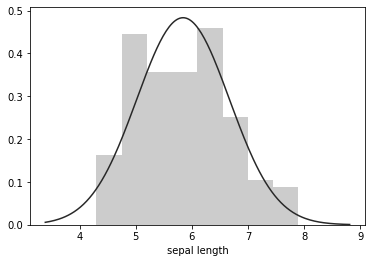

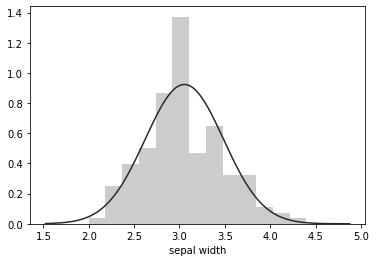

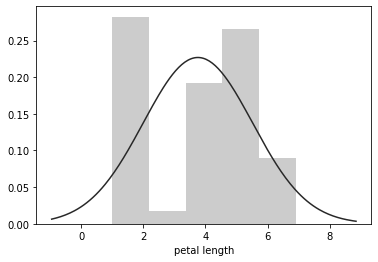

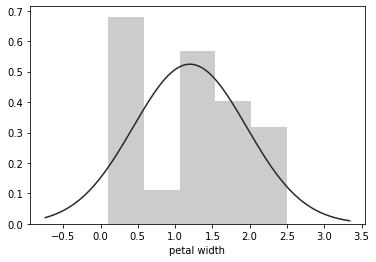

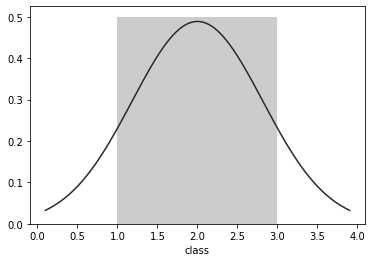

In [ ]:
# normal distribution

for i in df.columns:
  sns.distplot(df[i],color='gray',fit=norm,kde=False)
  plt.show()

*d) Missing value plot* 

In [ ]:
# missing values

missing_val_count_by_column=df.isna().sum()
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


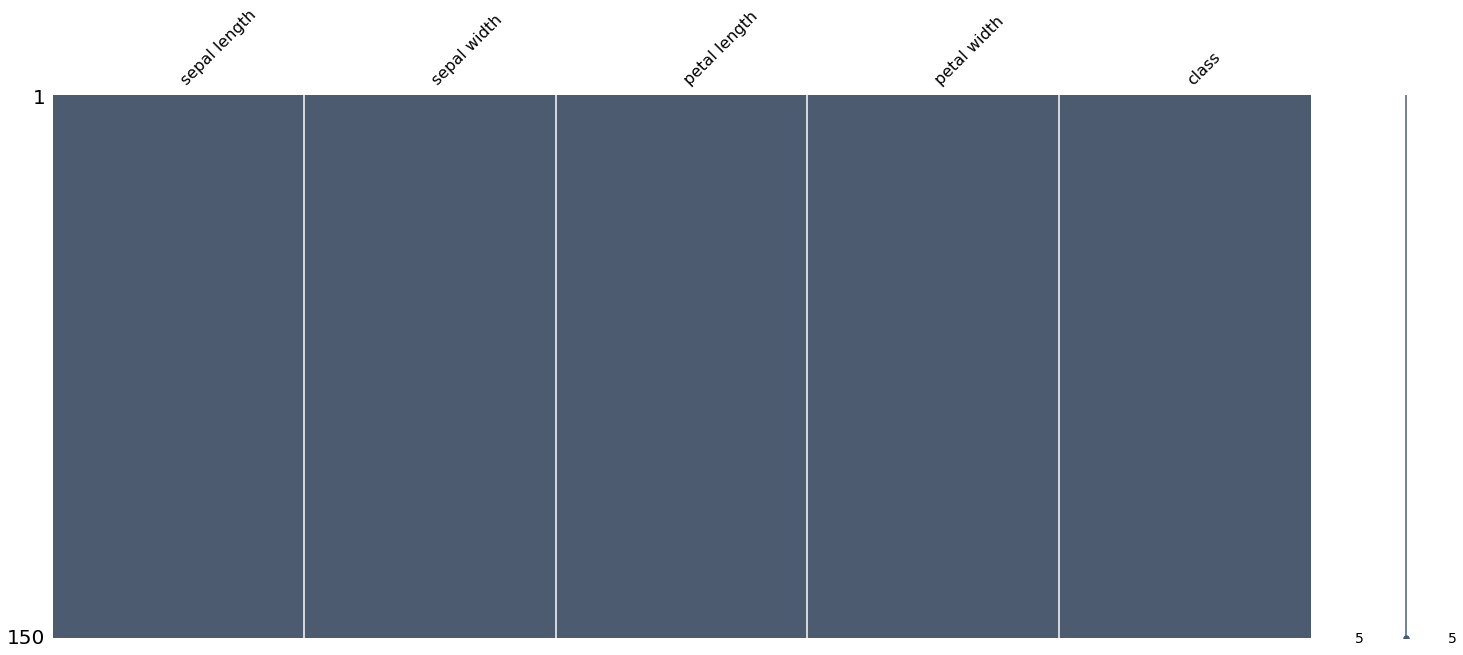

In [ ]:
# missing value plot

import missingno as msno
msno.matrix(df,color=(0.3,0.36,0.44))

*e) Correlation* 

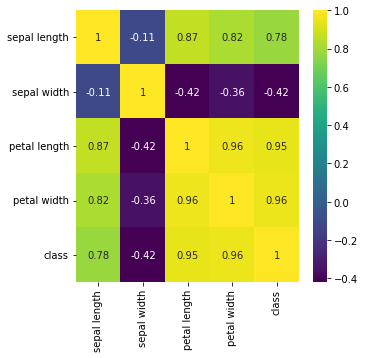

In [ ]:
# correlation

plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),cmap='viridis', annot = True)

**MODEL BUILDING** 

*Naive Bayes* 

In [ ]:
# Required packages

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics,  linear_model
from sklearn.naive_bayes import GaussianNB

In [ ]:
# EXTRACTING INDEPENDENT AND DEPENDENT VARIABLES
X = df.iloc[:, [0,1,2,3]].values
y = df.iloc[:,4].values

In [ ]:
# test_train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
algorithm = GaussianNB()

In [ ]:
 # Creating the model. We will fit the algorithm to the training data
 
model = algorithm.fit(X_train, y_train)     
gnb_acc = round(model.score(X_train, y_train)*100, 2)

In [ ]:
# Algorithm result

print('Accuracy of the model is: ', gnb_acc)

Accuracy of the model is:  96.67


In [ ]:
from sklearn.metrics import accuracy_score
y_pred_gaussianNB = model.predict(X_test)

gnb_acc_test = round(accuracy_score(y_test,y_pred_gaussianNB)*100, 2)
print('Accuracy of Gaussian NB is: ', gnb_acc_test)

Accuracy of Gaussian NB is:  90.0


*Support Vector Machine*

In [ ]:
# Support vector classifier

from sklearn.svm import SVC

In [ ]:
algorithm = SVC(kernel='linear')

In [ ]:
 # Creating the model. We will fit the algorithm to the training data
 
model = algorithm.fit(X_train, y_train)     
svm_acc = round(model.score(X_train, y_train)*100, 2)

In [ ]:
# Algorithm result

print('Accuracy of the model is: ', svm_acc)

Accuracy of the model is:  97.5


In [ ]:
from sklearn.metrics import accuracy_score
y_pred_svm = model.predict(X_test)

svm_acc_test = round(accuracy_score(y_test,y_pred_svm)*100, 2)
print('Accuracy of SVM is: ', svm_acc_test)

Accuracy of SVM is:  100.0


- We can see that Support Vector Machine works well for this data.
- Hence is preferred.